# Individual Assignment A2

This assessment is marked out of 50 and comprises 50% of the final course mark.

Due by 23:59 on Friday 11th of December 2020, to be submitted via email to m.pereyra@hw.ac.uk.

### Academic misconduct

The assessment is primarily summative in nature. You are expected to be aware of and abide by University policies on academic misconduct.

- [School of Mathematics academic misconduct advice and policies](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)
- [Academic Services academic misconduct information](https://www.ed.ac.uk/academic-services/students/conduct/academic-misconduct)

**This is an individual assignment - do not copy the work of another student.**

If you use any resources (e.g. textbooks or websites) then include appropriate references in your solutions. Course materials do not need to be referenced, but you should clearly state which results you are using.


### Code commentary

Your code should be extensively commented, with the functionality of each line of code explained with a comment. This is to test your understanding of the code you have written. Up to half of the marks associated with the coding part of a question may be deducted for a missing, incomplete, or inaccurate code commentary.

Your comments should explain what the code does, as well as why it does it.

The following provides an example of the expected level of commenting.

In [ ]:
def is_prime(n):
    """
    Return whether an input positive integer is prime.
    """
    
    if n == 1:        # If n is 1 ...
        return False  # ... then n is not prime
    
    for i in range(2, n):  # Test integers i from 2 to n - 1 inclusive
        if n % i == 0:     # If n is divisible by i ...
            return False   # ... then n is not prime
    # If n is not divisible by any integers from 2 to n - 1 inclusive then n is
    # prime
    return True

### Output 

Your code must generate and display all relevant output when run. Rerun your code cells after editing your code, to make sure that the output is updated.

### Markdown cells

You can enter your answers to theoretical questions in the Markdown cells provided in this notebook. To start editing the cell, press shift+enter or double click on it. You can use basic Latex. To render the cell, press shift+enter or run.

Alternatively, you can submit a pdf of your hand-written and scanned in answers to the email above, alongside this notebook.

# Question 1: Comparing RWM and MALA for a simple Gaussian mixture model


Consider a random variable $\textbf{X}$ with probability density function
$$
\pi(\mathbf{x})=\frac{1}{2(2\pi)^{d/2}} \left(\exp\{-0.5\|\mathbf{x}-\mathbf{a}\|_2^2\} + \exp\{-0.5\|\mathbf{x}+\mathbf{a}\|_2^2\}\right), \quad \mathbf{x} \in \mathbb{R}^{d}\, ,
$$
with respect to the Lebesgue measure on $\mathbb{R}^{d}$, and where the elements of $\textbf{a} \in \mathbb{R}^d$ are to $a_j = 1/\sqrt{2d}$ for all $j = 1,\ldots,d$.

### 1.1

State the expression of the iterates of the Random Walk Metropolis Algorithm to generate samples from $\pi$

*Enter your solution here*

### 1.2

Write down a first order stochastic differential equation that is ergodic with respect to $\pi$. Explain how this can be incorporated into a proposal such that you obtain the Metropolis Adjusted Langevin Algorithm (MALA)  and state the expression of the its iterates.

*Enter your solution here*

### 1.3 

In the code cell below, implement the RWM algorithm in the form of a function that takes as input: an initial condition $X_{0}$, proposal variance $\Delta t$, the dimension of the Markov chain $d$, and the number of samples $m$, while it outputs the Markov Chain $(\mathbf{X}_{k}=(X^{(1)}_{k},X^{(2)}_{k},\cdots,X^{(d)}_{k}),k=1,\cdots,m)$, and an estimate of the acceptance probability $\alpha$ (this refers to the overall probability of accepting a proposed move as estimated from the Markov chain, not the probability of accepting a specific move computed at a specific iteration).


In [ ]:
import numpy as np

# add code here
# 

### 1.4

In the code cell below, implement the MALA algorithm in the form of a function that takes as input: an initial condition $X_{0}$, proposal variance $\Delta t$, the dimension of the Markov chain $d$, and the number of samples $m$, while it outputs the Markov Chain $(\mathbf{X}_{k}=(X^{(1)}_{k},X^{(2)}_{k},\cdots,X^{(d)}_{k}),k=1,\cdots,m)$, and an estimate of the acceptance probability $\alpha$.


In [ ]:
import numpy as np

# add code here




### 1.5

It is known in the literature that the optimal acceptance probability for RWM is 0.234 and for MALA is 0.576. Identify the value of $\Delta t$ in RMW and in MALA to achieve the desired acceptance probability in case of $d = 8$. 

A way to automatically tune the algorithms in order to achieve the desired acceptance probability is by ajusting the proposal variance $\Delta t$ within your MCMC chain in the following way
$$
\Delta t_{k+1}=\Delta t_{k}+\frac{\Delta t_{k}}{k}\left(\alpha(k)-\alpha_{*}\right)
$$
where $\alpha(k)$ is the acceptance probability of the chain at iteration $k$, and $\alpha_{*}$ is the desired acceptance probability.

In [ ]:
import numpy as np

# add code here

### 1.6


Use the codes above to investigate the performance of the algorithms for $d = 8$. In particular, use the codes to compute a Monte Carlo estimate of $\textrm{E}(\|\textbf{X}\|_2^2)$ and show the evolution of your estimates as a function of the number of the number of iterations (Hint: for the considered model, $\textrm{E}(\|\textbf{X}\|_2^2) = 8.5$). What do you observe?




*Add your discussion here*

# Question 2: Image inpaiting by sparse regularisation 

Image impainting methods seek to recover an uknown image $x \in \mathbb{R}^d$ from a partial and noisy observation $y \in \mathbb{R}^d$ that only contains (corrupted versions of) a subset of the pixels of $x$. We focus on linear inpainting problems of the form $y = \Phi (x + w)$ with $w \sim \mathcal{N}(0,\sigma^2 \mathbb{I}_n)$, and where the so-called masking operator $\Phi \in \mathbb{R}^{n \times n}$ is a diagonal with matrix with diagonal elements $\Phi_{i,i}=1$ when the i-th pixel $x_i$ is observed, and $\Phi_{i,i}=0$ $x_i$ is not observed.

Here we consider image inpainting by sparse regularisation. More precisely, we promote sparsity on a redundant wavelet frame $\Psi \in \mathbb{R}^{d \times p}$ (a wavelet frame is essentially a concatenation of wavelet bases). On this frame, the unknown image is represented by a vector of wavelet coefficients $a \in \mathbb{R}^p$, with $p >> d$. To map $a$ to the pixel domain we apply $x = \Psi a$.

To solve the inpainting problem we use the following estimator that promotes solutions that are sparse on $\Psi$:

$$
a^* = \textrm{argmin}_{a \in \mathbb{R}^p} \quad F_1(a) + F_2(a)\, ,
$$

where 
$$
F_1(a) = \frac{1}{2}\|y - \Phi \Psi a\|_2^2 \quad F_2(a) = \alpha \|a\|_1\, ,
$$

and where $\alpha > 0$ is a regularisation parameter (we use $\alpha = 0.01$). We report the solution on the pixel domain, i.e., $x^* = \Psi a^*$.

Notice that to represent $x$ on the frame we set $a = U \Psi^\star x$, where $\Psi^\star \in \mathbb{R}^{p \times d}$ is the adjoint of $\Psi$, and $U \in \mathbb{R}^{p \times p}$ is a matrix derived from $\Psi$ and $\Psi^\star$ whose role is to take into account the fact that $\Psi$ and $\Psi^\star$ do not form a pair of orthonormal matrices. This is useful, for example, for using $y$ to initialise optimisation algorithms to compute $a^*$ (i.e., we set $a_y = U \Psi^\star y$ as initial condition).


To implement the operators $\Phi$, $\Psi$, $\Psi^\star$, and $U$, we use the nt_toolbox library, available from https://github.com/gpeyre/numerical-tours/raw/master/python/nt_toolbox.zip (to use this library, download the .zip file and extract within your working directory from which you will run the notebook). The operators are defined as follows:

In [4]:
from __future__ import division
import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt
from nt_toolbox.general import *
from nt_toolbox.signal import *
from nt_toolbox.perform_wavelet_transf import *
from numpy import random
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2


### Masking operator
# Operator setup
n = 128                                              # dimension (number of image pixels)
rho = .5                                             # proportion of unobserved pixels

Omega = np.zeros([n, n])
sel = random.permutation(n**2)
np.ravel(Omega)[sel[np.arange(int(rho*n**2))]] = 1

# Operator \Phi
Phi = lambda f, Omega: f*(1-Omega)


### Frame operators
# Operator setup
Jmax = np.log2(n)-1
Jmin = (Jmax-3)
J = Jmax-Jmin + 1
u = np.hstack(([4**(-J)], 4**(-np.floor(np.arange(J + 2./3,1,-1./3)))))
Xi = lambda a: perform_wavelet_transf(a, Jmin, -1, ti=1)   

# Operator \Psi, \Psi^\star, and U
U = np.transpose(np.tile(u, (n,n,1)),(2,0,1))                           # Operator U
Psi = lambda a: Xi(a/U)                                                 # Operator \Psi
PsiS = lambda f: perform_wavelet_transf(f, Jmin, + 1, ti=1)             # Operator \Psi^\star


The code below generates the observation $y = \Phi (x + w)$, where $w \sim \mathcal{N}(0,\sigma^2 \mathbb{I}_n)$ with noise standard deviation $\sigma = 0.01$.

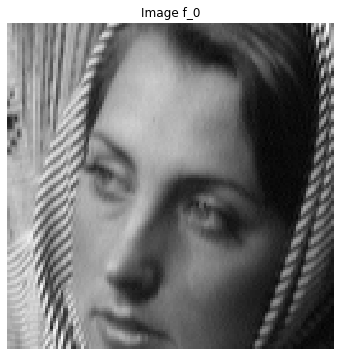

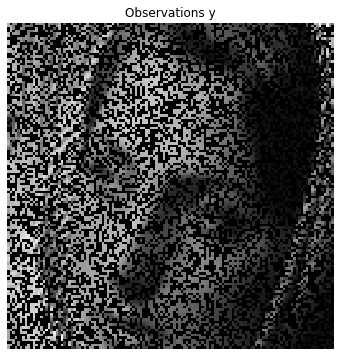

In [5]:
# Load the "barbara" image
f0 = load_image("barb128.bmp")

# Display original image
plt.figure(figsize = (6,6))
imageplot(f0, 'Image f_0')

# Generate noisy and partial observation 'y'
sigma = 0.01;
y = Phi(f0 + sigma*random.standard_normal(f0.shape), Omega);

# Display observation (unseen pixels are assigned value '0')
plt.figure(figsize = (6,6))
imageplot(y, 'Observations y')

# Compute representation of 'y' on wavelet frame \Psi
ay = U*PsiS(y)

### 2.1
The proximal-gradient algorithm is a standard proximal splitting technique to compute $a^*$ by using the gradient operator $\nabla F_1$ and the proximal operator $prox^\lambda_{F2}$, which are given by

$$
\nabla F_1 (a) = \Psi^\star \Phi (y - \Phi \Psi a) \, ,
$$

and

$$
[prox^\lambda_{F2}(a)]_j = a_j \textrm{max}(0,1-\lambda\alpha/|a_j|) \quad \forall j = 1,\ldots,p \, ,
$$

In the code cell below, use the python operators $\Phi$, $\Psi$, and $\Psi^\star$ defined above by using the nt_toolbox library, to construct the operators $\nabla F_1$ and $\textrm{prox}^\lambda_{F_2}$.

In [16]:
### Gradient operator of F1


### Proximal operator of F2 (the soft thresholding operator)


### 2.2 
State the expression of the iterates of the *proximal-gradient algorithm* to compute $a^*$.

*Enter your solution here*

### 2.3

In the code cell below, implement the proximal gradient algorithm to compute $a^*$ in the form of a function that takes as input: an initial condition $a_{0}$, a step size $\delta$, and a number of iterations $T$, while it outputs the final iterate $a_T$ and the sequence of function values $F(a_t) = F_1(a_t) + F_2(a_t)$ for $t = 1,\ldots,T$. 



### 2.4

Use the code above to compute the solution $x^*$. We recommend using as initial condition $a_y$ and at least $T > 10^4$ iterations. Present any scripts and numerical tests that you run in the code cell below. Any output you use in your discussion should be displayed and easily interpretable.

Hint: To set the step size $\delta$, use the fact the gradient $\nabla F_1$ is $\beta$-Lipschitz continuous with constant $\beta = 4^4$. If the algorithm is correctly implemented and converging, you will observe that $F(a_t)$ decreases monotonically.

In [2]:
# add your code here

In [126]:
# add your code here


*Add your discussion here*